<a href="https://colab.research.google.com/github/litAardvark/CSE151A_Group_Project_SII25/blob/main/CSE151A_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
Abstract (Work in progress):

Flight delays are a costly and frustrating inevitability for even the savviest of flyers. Itineraries that accurately account for delays stand to ease a major pain point for travelers on commercial airlines. Our project seeks to address this problem by predicting the length of flight delays using machine learning. To this end, we propose the use of a supervised Support Vector Regression model. Our proposed dataset contains flight data from 2009 to 2019, gathered from the US Department of Transportation's Bureau of Transportation Statistics. We plan to implement a machine learning pipeline for training and testing. The output of our final model will enable us to identify the variables associated with longer delays.

# Datasets

**Dataset #1**: Airline Delay Analysis - contains relevant information about most US flights for a period of ten years beginning in 2009 and ending in 2019.

Link: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis

Location: /content/airline_delay_analysis


# Team

Jason Bulux
jbulux@ucsd.edu

Rosario Ortiz
mdortiz@ucsd.edu

Kwadwo Danquah
kdanquah@ucsd.edu

Sam Kogan
skogan@ucsd.edu

# Setup

[README](https://github.com/litAardvark/CSE151A_Group_Project_SII25/blob/main/README.md)

Mounted G drive to be able to use kaggle API key to download and unzip the dataset into the session.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


kaggle API key saved on Google Drive at the path:
MyDrive/Colab Notebooks

In [ ]:
!mkdir ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Download dataset from kaggle.

In [ ]:
!kaggle datasets download -d sherrytp/airline-delay-analysis

Dataset URL: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis
License(s): DbCL-1.0
100% 2.19G/2.19G [00:27<00:00, 351MB/s]
100% 2.19G/2.19G [00:27<00:00, 87.0MB/s]


Unzip it into the session.

In [ ]:
!unzip airline-delay-analysis.zip

Archive:  airline-delay-analysis.zip
  inflating: airline delay analysis/20.csv  
  inflating: airline delay analysis/2009.csv  
  inflating: airline delay analysis/2010.csv  
  inflating: airline delay analysis/2011.csv  
  inflating: airline delay analysis/2012.csv  
  inflating: airline delay analysis/2013.csv  
  inflating: airline delay analysis/2014.csv  
  inflating: airline delay analysis/2015.csv  
  inflating: airline delay analysis/2016.csv  
  inflating: airline delay analysis/2017.csv  
  inflating: airline delay analysis/2018.csv  
  inflating: airline delay analysis/2019.csv  


**DATA EXPLORATION**

Check for empty cells and duplicated rows in the dataset.

In [ ]:
import pandas as pd

total_empty_cells = 0
duplicates = 0

print("checking dataset for missing and duplicated data")
filepath = '/content/airline delay analysis'

# The chosen csv files will be combined into one df
concatenated_df = pd.DataFrame()

for d in range(2018, 2019): #The loop excludes the endpoint
  print("checking ", d)
  df = pd.read_csv(f'{filepath}/{d}.csv')

# Drop empty columns and rows
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

# Check remaining columns for empty cells
empty_cells = df.isnull().sum()

#print(empty_cells)
total_empty_cells += empty_cells.sum()
duplicates += df.duplicated().sum()

print("total empty cells:", total_empty_cells)
print("duplicates:", duplicates)
print("total rows:", len(df))
print("total columns:", len(df.columns))
print("columns:", df.columns.to_list())

checking dataset for missing and duplicated data
checking  2018
total empty cells: 37625423
duplicates: 0
total rows: 7213446
total columns: 27
columns: ['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


**ALWAYS RUN 5TH CELL AGAIN BEFORE RUNNING EITHER OF THE CELLS BELOW**

Re-run 5th cell before running the cell below.

In [ ]:
#Checking dataset info if target = ARR_DELAY

# Define the columns to scan
selected_columns = ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']
# Filter out rows where 'CANCELLED' is 0
df = df[df['CANCELLED'] != 1]
df = df[df['DIVERTED'] != 1]
df.drop(columns=['CANCELLED'], inplace=True)
df.drop(columns=['DIVERTED'], inplace=True)
# Select only the specified columns
feature_df = df[selected_columns]
#target_df = df['ARR_DELAY']

print("features:", feature_df.columns.to_list())
print("feature shape:", feature_df.shape)
#print("target shape:", target_df.shape)

features: ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']
feature shape: (7079005, 9)


##Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = feature_df.select_dtypes(include=["number"]).columns
sns.heatmap(feature_df[numerical_cols],
            annot=True,
            linewidth=.5,
            cmap = sns.color_palette("magma", as_cmap=True))

In [ ]:
sns.barplot(feature_df, x="OP_CARRIER", y="ARR_DELAY")
sns.barplot(feature_df, x="DEST", y="ARR_DELAY")
sns.barplot(feature_df, x="ORIGIN", Y="ARR_DELAY")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# select features
features = ['CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']
df_corr = pd.concat([concatenated_df[features].copy(), target_df], axis = 1)


# compute corr matrix
corr = df_corr.corr()

# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
sns.pairplot(pd.concat(concatenated_df[features], target_df))

The pairplot below was generated locally from the 2018 dataset using the code

```
df_2018 = pd.read_csv(f'{filepath}/2018.csv')
selected_columns = ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']
df_2018_select = df_2018[[selected_columns]]
sns.pairplot(df_2018_select)
```



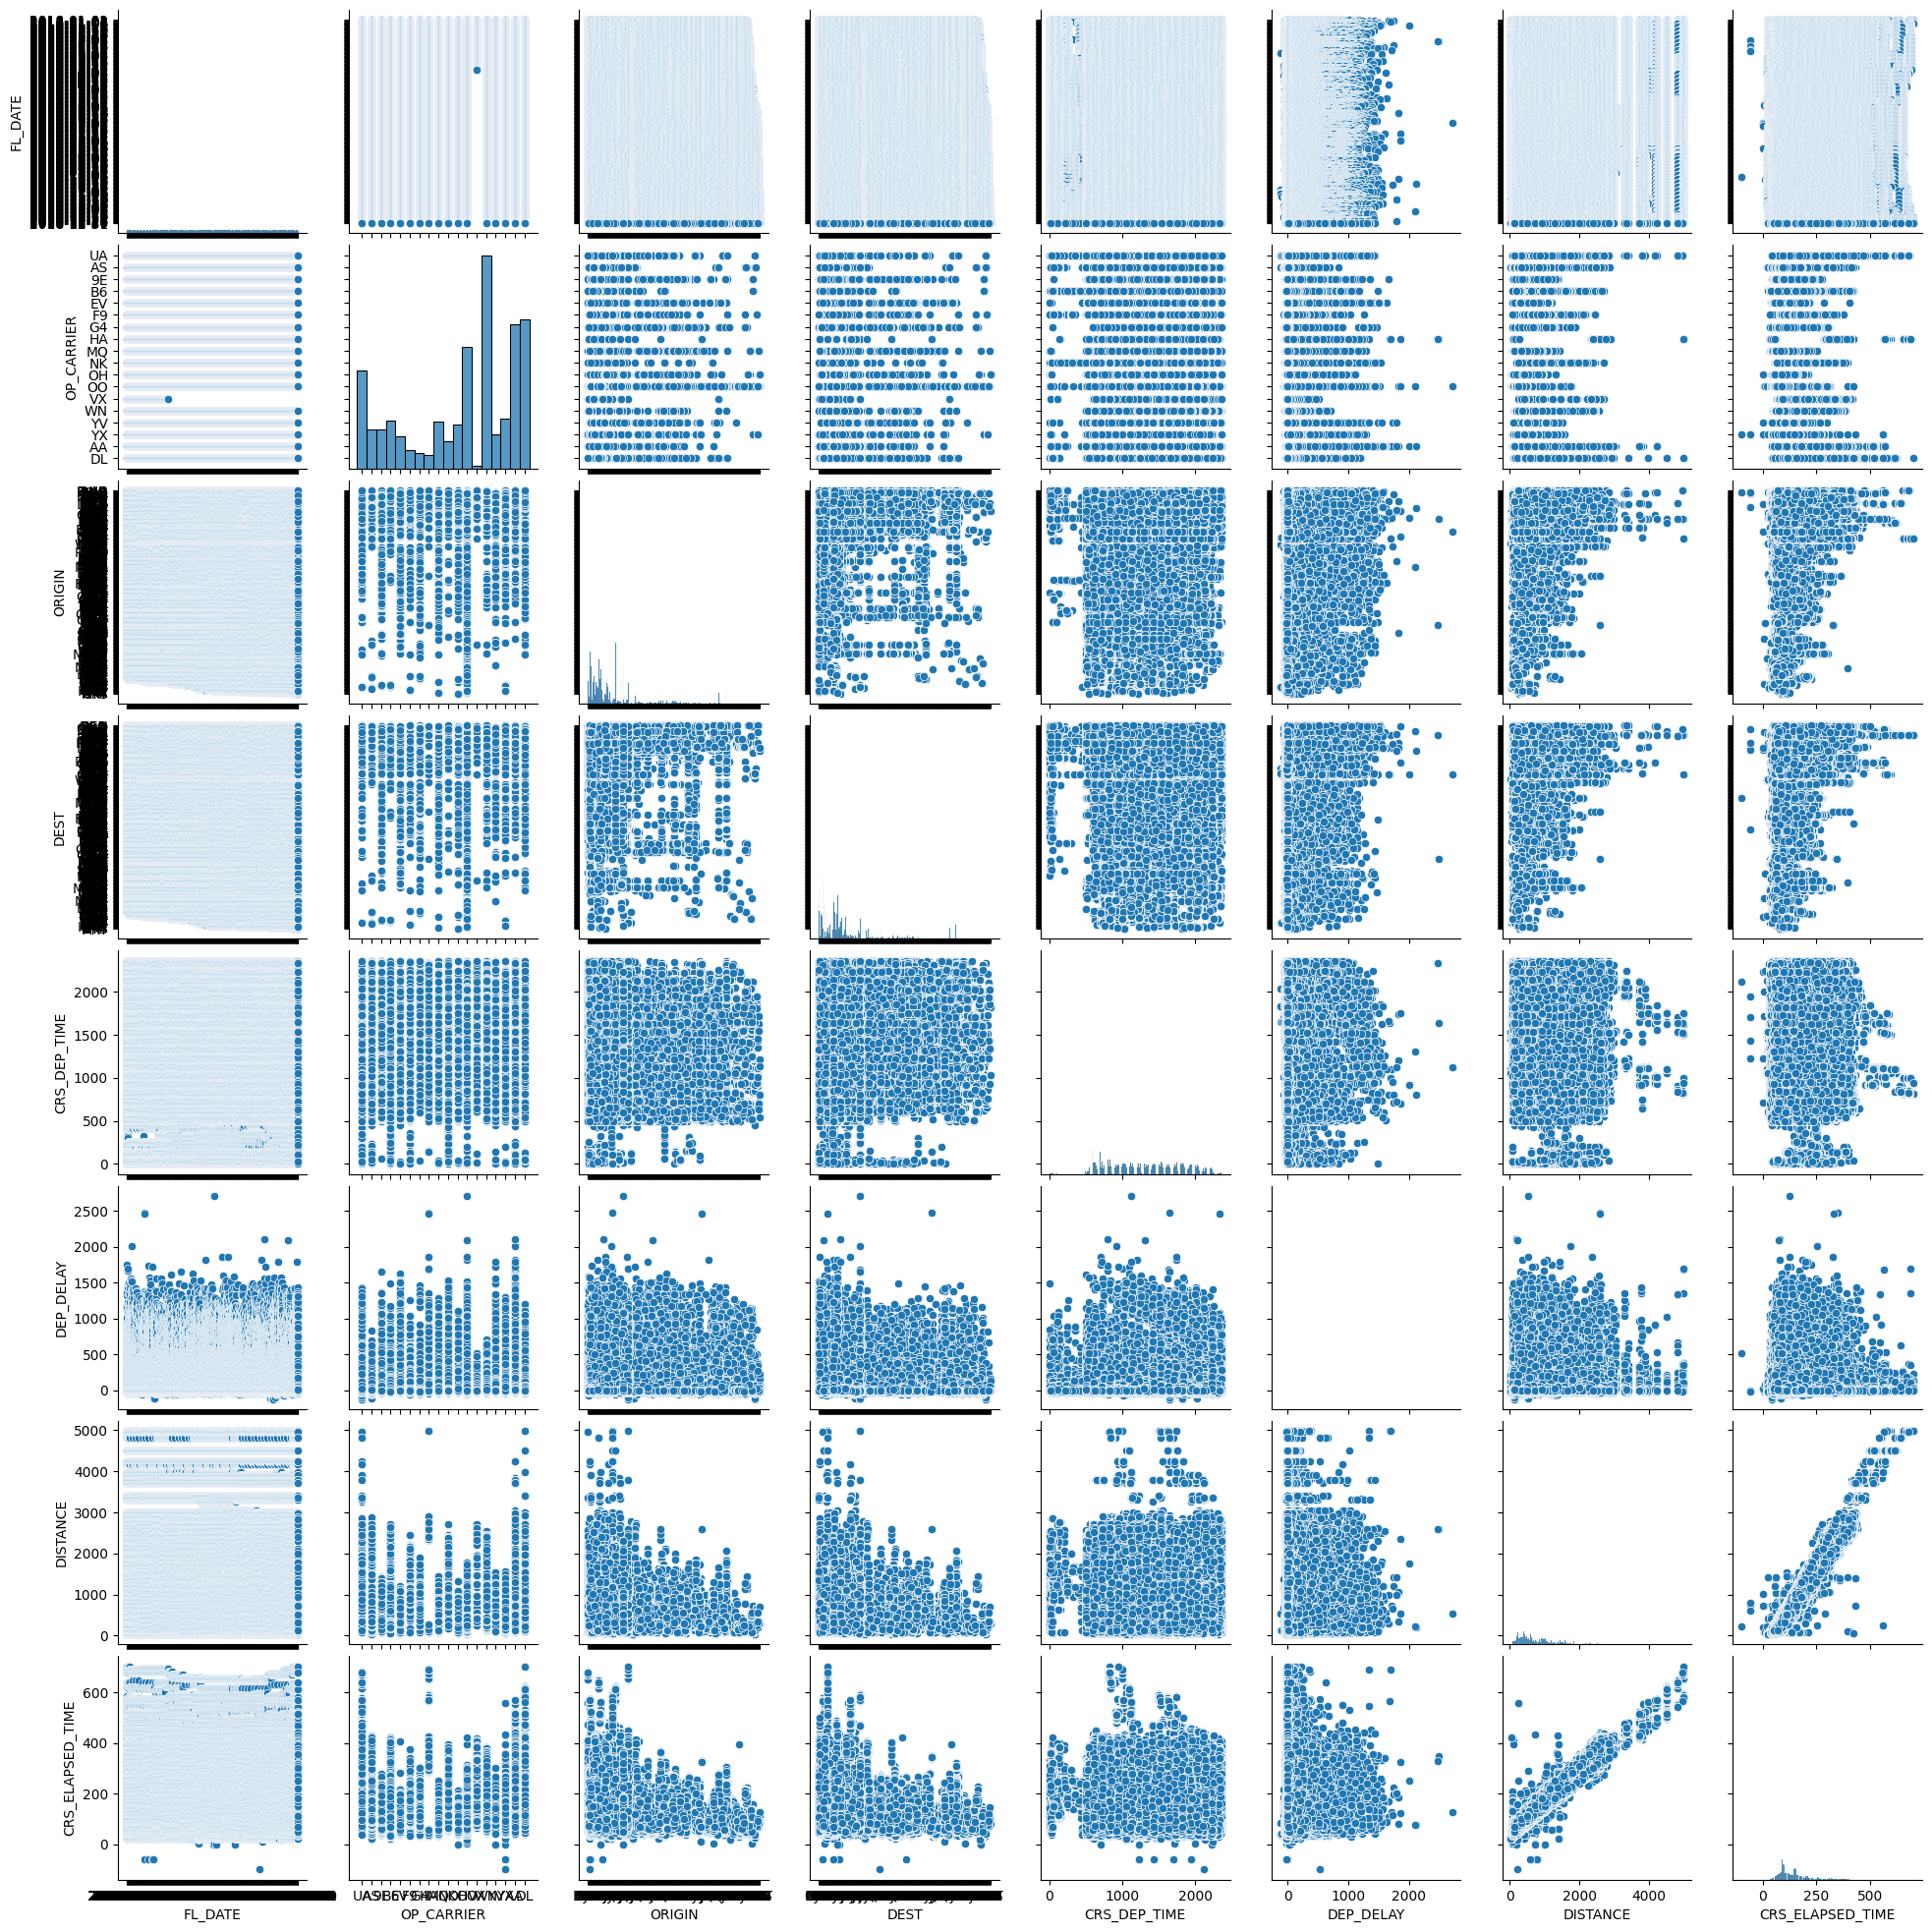

**Data Reduction**

In [88]:
reduced_feature_df = feature_df.sample(frac=0.0069, random_state=42).reset_index(drop=True)
# print(reduced_feature_df.shape)

**Categorical Data**

In [89]:

categorical_feats = ["OP_CARRIER", "ORIGIN", "DEST"]
def replace_missing_mode(df, cats):
  modes = []
  #calculate mode of each categorical column
  for f in cats:
     mode = reduced_feature_df[f].mode()
     print (f"Mode of {f} is: {mode}")
     df[f].fillna(mode)



In [90]:
def one_hot_encode (df, cats):
  for f in cats:
    enc = pd.get_dummies(df[f], dtype=int, prefix=str(f))
    df = df.drop(f, axis = 1)
    df = pd.concat([df, enc], axis=1)
  return df

reduced_feature_df = one_hot_encode(reduced_feature_df, categorical_feats)

**Numerical Encoding**

In [91]:
import numpy as np
from datetime import datetime

display(reduced_feature_df.head())
cycled_feature_df = reduced_feature_df.copy()
missing = reduced_feature_df.isnull().sum()
print("empty cells: ",missing)


# Encode time as a cycle
def transform_time_cyclical(df, col, max):
    transformed = np.sin(2 * np.pi * df[col] / max)
    return transformed

print("Encoding raw time as a cycle...")
cycled_feature_df['CRS_DEP_TIME'] = transform_time_cyclical(reduced_feature_df, 'CRS_DEP_TIME', 2400)
display(cycled_feature_df.head())


# Replace missing value with the mean
print("Replacing missing numerical values...")
num_feats = ['CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']
for col in num_feats:
  cycled_feature_df[col] = np.where(cycled_feature_df[col].isnull(), np.nanmean(cycled_feature_df[col]), cycled_feature_df[col])

missing = cycled_feature_df.isnull().sum()
print("empty cells after: ", missing)

# Encode the dates as numerical values on a 365 cycle
print("Encoding date as a cycle...")
cycled_feature_df['FL_DATE'] = pd.to_datetime(cycled_feature_df['FL_DATE'])
cycled_feature_df['FL_DATE'] = cycled_feature_df['FL_DATE'].map(lambda x: x.timetuple().tm_yday)
cycled_feature_df['FL_DATE'] = transform_time_cyclical(cycled_feature_df,'FL_DATE', 365)
display(cycled_feature_df.head())



FL_DATE  CRS_DEP_TIME  DEP_DELAY  DISTANCE  CRS_ELAPSED_TIME  ARR_DELAY  \
0  2018-03-22          1905       -6.0     933.0             148.0      -16.0   
1  2018-12-27          1140       28.0     307.0              75.0       48.0   
2  2018-06-05          1842       -9.0     602.0             103.0      -13.0   
3  2018-05-17          1220       57.0     393.0             120.0       47.0   
4  2018-09-11          1714       -8.0    1144.0             201.0      -18.0   

   OP_CARRIER_9E  OP_CARRIER_AA  OP_CARRIER_AS  OP_CARRIER_B6  ...  DEST_UIN  \
0              0              0              1              0  ...         0   
1              0              0              0              0  ...         0   
2              0              0              0              0  ...         0   
3              0              0              0              0  ...         0   
4              0              1              0              0  ...         0   

   DEST_USA  DEST_VEL  DEST_VLD  DEST_VPS  DEST_WRG  DEST_WYS  DEST_XNA  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   DEST_YAK  DEST_YUM  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 718 columns]

empty cells:  FL_DATE              0
CRS_DEP_TIME         0
DEP_DELAY           29
DISTANCE             0
CRS_ELAPSED_TIME     0
                    ..
DEST_WRG             0
DEST_WYS             0
DEST_XNA             0
DEST_YAK             0
DEST_YUM             0
Length: 718, dtype: int64
Encoding raw time as a cycle...


FL_DATE  CRS_DEP_TIME  DEP_DELAY  DISTANCE  CRS_ELAPSED_TIME  ARR_DELAY  \
0  2018-03-22     -0.962455       -6.0     933.0             148.0      -16.0   
1  2018-12-27      0.156434       28.0     307.0              75.0       48.0   
2  2018-06-05     -0.993961       -9.0     602.0             103.0      -13.0   
3  2018-05-17     -0.052336       57.0     393.0             120.0       47.0   
4  2018-09-11     -0.974761       -8.0    1144.0             201.0      -18.0   

   OP_CARRIER_9E  OP_CARRIER_AA  OP_CARRIER_AS  OP_CARRIER_B6  ...  DEST_UIN  \
0              0              0              1              0  ...         0   
1              0              0              0              0  ...         0   
2              0              0              0              0  ...         0   
3              0              0              0              0  ...         0   
4              0              1              0              0  ...         0   

   DEST_USA  DEST_VEL  DEST_VLD  DEST_VPS  DEST_WRG  DEST_WYS  DEST_XNA  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   DEST_YAK  DEST_YUM  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 718 columns]

Replacing missing numerical values...
empty cells after:  FL_DATE             0
CRS_DEP_TIME        0
DEP_DELAY           0
DISTANCE            0
CRS_ELAPSED_TIME    0
                   ..
DEST_WRG            0
DEST_WYS            0
DEST_XNA            0
DEST_YAK            0
DEST_YUM            0
Length: 718, dtype: int64
Encoding date as a cycle...


FL_DATE  CRS_DEP_TIME  DEP_DELAY  DISTANCE  CRS_ELAPSED_TIME  ARR_DELAY  \
0  0.984474     -0.962455       -6.0     933.0             148.0      -16.0   
1 -0.068802      0.156434       28.0     307.0              75.0       48.0   
2  0.440519     -0.993961       -9.0     602.0             103.0      -13.0   
3  0.705584     -0.052336       57.0     393.0             120.0       47.0   
4 -0.942761     -0.974761       -8.0    1144.0             201.0      -18.0   

   OP_CARRIER_9E  OP_CARRIER_AA  OP_CARRIER_AS  OP_CARRIER_B6  ...  DEST_UIN  \
0              0              0              1              0  ...         0   
1              0              0              0              0  ...         0   
2              0              0              0              0  ...         0   
3              0              0              0              0  ...         0   
4              0              1              0              0  ...         0   

   DEST_USA  DEST_VEL  DEST_VLD  DEST_VPS  DEST_WRG  DEST_WYS  DEST_XNA  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   DEST_YAK  DEST_YUM  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 718 columns]

**First Model**

**Scale Data**

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
print("Splitting data...")
x_train, x_test, y_train, y_test = train_test_split(cycled_feature_df.drop('ARR_DELAY', axis=1), cycled_feature_df['ARR_DELAY'], test_size=0.2, random_state=42)

def z_score_scale(df):
    mean = df.mean()
    std = df.std()
    df = (df - mean) / std
    return df

# Scale numerical data
print("Scaling numerical data...")
scale_feats = ['DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']
x_train[scale_feats] = z_score_scale(x_train[scale_feats])
x_test[scale_feats] = z_score_scale(x_test[scale_feats])
y_train = z_score_scale(y_train)
y_test = z_score_scale(y_test)

print("Train")
display(x_train.head())
display(y_train.head())

print("Test")
display(x_test.head())
display(y_test.head())

Splitting data...
Scaling numerical data...
Train


FL_DATE  CRS_DEP_TIME  DEP_DELAY  DISTANCE  CRS_ELAPSED_TIME  \
48837 -0.953681      1.000000  -0.312547  0.427864          0.379868   
31093 -0.538005      0.997859  -0.312547  0.110442         -0.094318   
33814  0.924291     -0.770513  -0.356351  0.412907          0.434061   
14500  0.361714     -0.309017  -0.071630 -0.391450         -0.338185   
23399 -0.840618     -0.996917  -0.312547 -0.024171         -0.094318   

       OP_CARRIER_9E  OP_CARRIER_AA  OP_CARRIER_AS  OP_CARRIER_B6  \
48837              0              0              0              0   
31093              0              0              0              0   
33814              0              0              0              1   
14500              0              0              0              0   
23399              0              0              0              0   

       OP_CARRIER_DL  ...  DEST_UIN  DEST_USA  DEST_VEL  DEST_VLD  DEST_VPS  \
48837              0  ...         0         0         0         0         0   
31093              1  ...         0         0         0         0         0   
33814              0  ...         0         0         0         0         0   
14500              0  ...         0         0         0         0         0   
23399              0  ...         0         0         0         0         0   

       DEST_WRG  DEST_WYS  DEST_XNA  DEST_YAK  DEST_YUM  
48837         0         0         0         0         0  
31093         0         0         0         0         0  
33814         0         0         0         0         0  
14500         0         0         0         0         0  
23399         0         0         0         0         0  

[5 rows x 717 columns]

48837    0.010599
31093   -0.530195
33814   -0.031001
14500   -0.176599
23399    0.072998
Name: ARR_DELAY, dtype: float64

Test


FL_DATE  CRS_DEP_TIME  DEP_DELAY  DISTANCE  CRS_ELAPSED_TIME  \
7762  -0.924291     -0.533615  -0.297714  0.401069          0.364285   
23881 -0.128748     -0.629320  -0.235909  3.248203          2.771113   
30507  0.705584     -0.734323  -0.318316 -0.328616          0.058214   
28911  0.608477      0.608761  -0.277113 -0.330321         -0.442629   
19484 -0.635432      1.000000  -0.462529 -0.870765         -0.943472   

       OP_CARRIER_9E  OP_CARRIER_AA  OP_CARRIER_AS  OP_CARRIER_B6  \
7762               0              0              0              0   
23881              0              0              0              0   
30507              0              0              0              0   
28911              0              0              1              0   
19484              0              0              0              0   

       OP_CARRIER_DL  ...  DEST_UIN  DEST_USA  DEST_VEL  DEST_VLD  DEST_VPS  \
7762               0  ...         0         0         0         0         0   
23881              1  ...         0         0         0         0         0   
30507              0  ...         0         0         0         0         0   
28911              0  ...         0         0         0         0         0   
19484              0  ...         0         0         0         0         0   

       DEST_WRG  DEST_WYS  DEST_XNA  DEST_YAK  DEST_YUM  
7762          0         0         0         0         0  
23881         0         0         0         0         0  
30507         0         0         0         0         0  
28911         0         0         0         0         0  
19484         0         0         0         0         0  

[5 rows x 717 columns]

7762     0.427931
23881   -0.304027
30507   -0.660114
28911   -0.284244
19484   -0.422722
Name: ARR_DELAY, dtype: float64

**Train And Evaluate First Model**

In [ ]:
# SVR model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

num_feats = ['FL_DATE','CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']


# Fraction of data to train on
fraction = 1.0


x_train = x_train.sample(frac=fraction, random_state=42)
y_train = y_train.sample(frac=fraction, random_state=42)
x_test = x_test.sample(frac=fraction, random_state=42)
y_test = y_test.sample(frac=fraction, random_state=42)

model = SVR(kernel='linear', C=5, epsilon=.001)
model.fit(x_train[num_feats], y_train)


train_mse = mean_squared_error(y_train, model.predict(x_train[num_feats]))
train_r2 = r2_score(y_train, model.predict(x_train[num_feats]))

y_pred = model.predict(x_test[num_feats])
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)


print("\nRegression Report For Model 1")
print("Model 1 TRAIN MSE: ", train_mse)
print("Model 1 TRAIN R2: ", train_r2)

print("Model 1 TEST MSE: ", test_mse)
print("Model 1 TEST R2: ", test_r2)

# Model 2
model = SVR(kernel='linear', C=50, epsilon=.1)
model.fit(x_train[num_feats], y_train)


train_mse = mean_squared_error(y_train, model.predict(x_train[num_feats]))
train_r2 = r2_score(y_train, model.predict(x_train[num_feats]))

y_pred = model.predict(x_test[num_feats])
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)


print("\nRegression Report For Model 2")
print("Model 2 TRAIN MSE: ", train_mse)
print("Model 2 TRAIN R2: ", train_r2)

print("Model 2 TEST MSE: ", test_mse)
print("Model 2 TEST R2: ", test_r2)



Regression Report For Model 1
Model 1 TRAIN MSE:  0.08043516947472854
Model 1 TRAIN R2:  0.919562772043647
Model 1 TEST MSE:  0.0708806408796149
Model 1 TEST R2:  0.9291121027075187

Regression Report For Model 2
Model 2 TRAIN MSE:  0.07989354879871627
Model 2 TRAIN R2:  0.920104406580713
Model 2 TEST MSE:  0.07033603081722742
Model 2 TEST R2:  0.929656768524417


**SECOND MODEL**

Using Unsupervised Learning to understand our data



In [92]:
unsupervised_df = cycled_feature_df.copy()
#unsupervised_df = unsupervised_df.drop(['FL_DATE', 'DEP_DELAY', 'ARR_DELAY'], axis=1) # We don't know what the unsupervised model will learn so we give it more information

Explained variance ratio: [0.00410996 0.00342804 0.00307195 0.00298134 0.00294302 0.00285018]
Principal components:
 [[ 0.00838041  0.0235724  -0.01917799 ... -0.02210346  0.00223461
  -0.01073352]
 [-0.00520633  0.00264077 -0.0803902  ...  0.00471657  0.00807775
   0.00339273]
 [ 0.002363    0.02029023 -0.1696123  ... -0.02803329  0.03513627
   0.01361218]
 [-0.00989255  0.02968855 -0.15858248 ...  0.00835122  0.06741058
   0.00580971]
 [ 0.01319666 -0.03591622  0.17431552 ... -0.01250503 -0.06628624
  -0.00275262]
 [-0.0150992  -0.10087582  0.45657255 ...  0.00653833 -0.00734506
   0.01614238]]


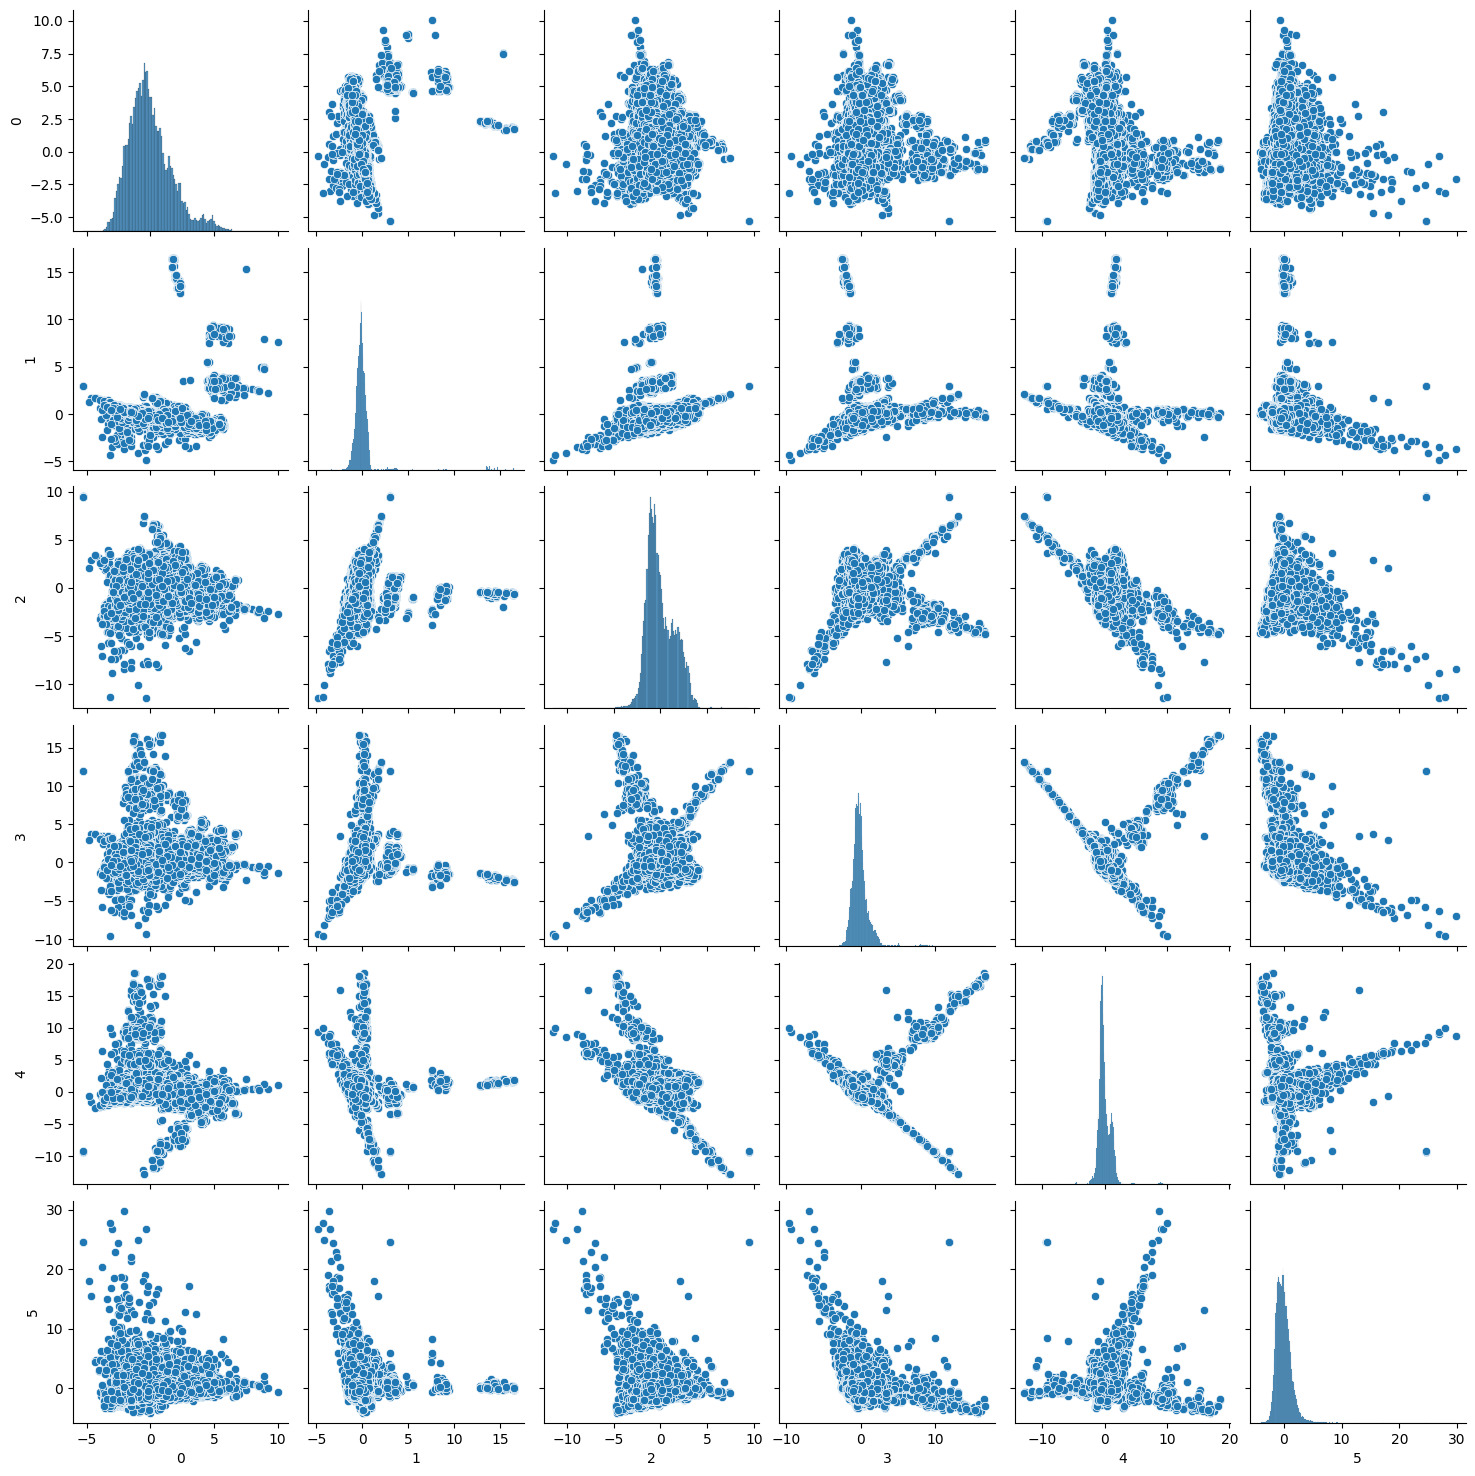

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(unsupervised_df)


pca = PCA(n_components=6) # Vary this for better clustering?
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components:\n", pca.components_)

sns.pairplot(pd.DataFrame(X_pca))
plt.show()

**Cluster**

Perform K-Means Clustering on the PCA reduced data for labels.

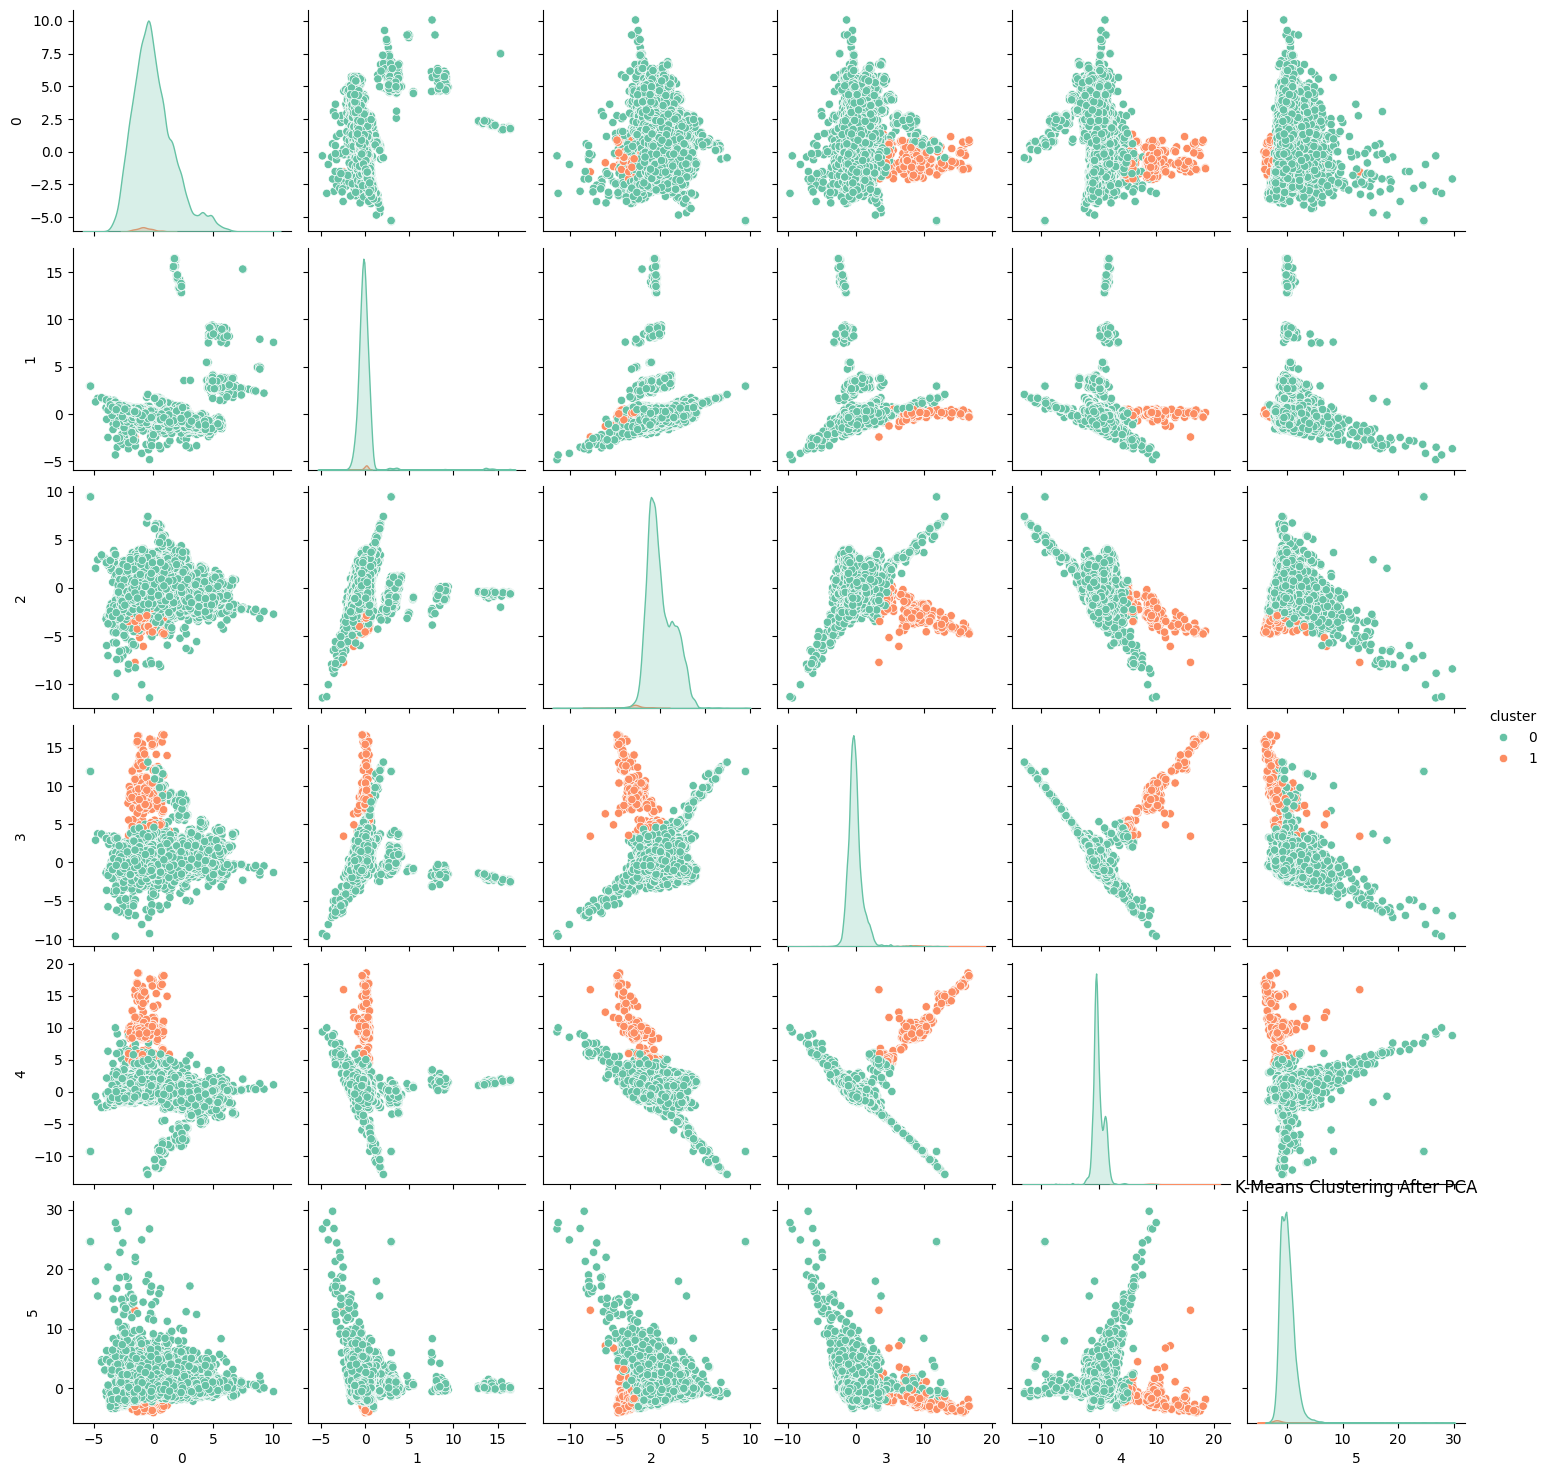

Silhouette Score: 0.7138115207476085


In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

clustered_df = pd.DataFrame(X_pca)
clustered_df['cluster'] = clusters

sns.pairplot(clustered_df, hue='cluster', palette='Set2')
plt.title("K-Means Clustering After PCA")
plt.show()



score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)

**Split Data and Train an SVM model**

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, confusion_matrix

print(X_pca.shape)
X_train, X_test, y_train, y_test = train_test_split(X_pca, clusters, test_size=0.2, random_state=42)


svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, svm.predict(X_train))
test_mse = mean_squared_error(y_test, svm.predict(X_test))
print("TRAIN MSE: ", train_mse)
print("TEST MSE: ", test_mse)
accuracy = svm.score(X_test, y_test)
print("\nSVM accuracy on pseudo-labeled data:", accuracy)

cm = confusion_matrix(y_test, svm.predict(X_test))
print('\nConfusion Matrix', cm)

FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
TN = cm[0, 0]

print('False Positives:', FP)
print('False Negatives:', FN)
print('True Positives:', TP)
print('True Negatives:', TN)




(48845, 6)
TRAIN MSE:  7.677346708977378e-05
TEST MSE:  0.00010236462278636504

SVM accuracy on pseudo-labeled data: 0.9998976353772137

Confusion Matrix [[9678    1]
 [   0   90]]
False Positives: 1
False Negatives: 0
True Positives: 90
True Negatives: 9678
